**Data Minning project**

This project is done by\
Saish Mhatre\
Gandhar Pansare\
Tanmayee Tanjane\
Guide - Britain Taylor

model 2\
brief overview of what we are doing ?\
We sre trying to do sentiment analysis on memes for that we have taken data from kaggle which contains all the images which are about 6992 images and one excel file with all the comments and their sentiment mentioned in it, We have tried to buid multimodal model which will predict the sentiment based on image and text.\
this code is for model number two here we have used two model resnet and VGG16 for image tranformation layer and basic neural network model for text transformation layer after concatinating the results of bot of these two layer we have presented our finding.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
Directory = "/content/drive/My drive/memotion_dataset_7k"

Here first we are importing all the necessary packages

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.utils import resample
import re
import string
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Activation, Dropout
from tensorflow.keras.layers import Conv1D, Embedding, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing import image
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, log_loss, classification_report, roc_auc_score, make_scorer
from scipy import stats
import json
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, make_scorer, roc_curve, ConfusionMatrixDisplay, precision_recall_curve
from sklearn.metrics import explained_variance_score


In [6]:
PATH = "/coontent/drive/My drive/memotion_dataset_7k"


In the code below we are reading the csv file and dropping unnmaed columns and 'text_ocr' column.\
also at the same time we are removing data will NULL values.

In [7]:
memes_data = pd.read_csv('/content/drive/My Drive/memotion_dataset_7k/labels.csv')
memes_data.drop(memes_data.columns[memes_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
memes_data = memes_data.drop(columns = ['text_ocr'])
memes_data.head()

,image_name,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,hilarious,general,not_offensive,not_motivational,very_positive
1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,not_funny,general,not_offensive,motivational,very_positive
2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,very_funny,not_sarcastic,not_offensive,not_motivational,positive
3,image_4.png,10 Year Challenge - Sweet Dee Edition,very_funny,twisted_meaning,very_offensive,motivational,positive
4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,hilarious,very_twisted,very_offensive,not_motivational,neutral


In [8]:
memes_data[memes_data.isnull().any(axis=1)]

,image_name,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
119,image_120.jpg,NaN,not_funny,general,not_offensive,not_motivational,positive
4799,image_4800.jpg,NaN,very_funny,general,slight,motivational,neutral
6781,image_6782.jpg,NaN,very_funny,twisted_meaning,not_offensive,not_motivational,positive
6784,image_6785.jpg,NaN,hilarious,general,not_offensive,not_motivational,positive
6786,image_6787.jpg,NaN,not_funny,not_sarcastic,very_offensive,motivational,positive


In [9]:
full_memes_data = memes_data.copy()
full_memes_data.isnull().any()

image_name           False
text_corrected        True
humour               False
sarcasm              False
offensive            False
motivational         False
overall_sentiment    False
dtype: bool

In [10]:
clean_memes_data = memes_data.copy()
clean_memes_data.dropna(inplace=True)
clean_memes_data.isnull().any()

image_name           False
text_corrected       False
humour               False
sarcasm              False
offensive            False
motivational         False
overall_sentiment    False
dtype: bool

Now lets convert this text data into numeric variables so that we can understand it and use it in our model properly

In [11]:
memes_data = memes_data.replace({'humour': {'not_funny': 0, 'funny': 1, 'very_funny': 2, 'hilarious':3},
            'sarcasm': {'not_sarcastic': 0, 'general': 1, 'twisted_meaning': 2, 'very_twisted': 3},
            'offensive': {'not_offensive': 0, 'slight': 1, 'very_offensive': 2, 'hateful_offensive': 3},
            'motivational': {'not_motivational': 0, 'motivational': 1},
            'overall_sentiment': {'very_negative': 0, 'negative': 1, 'neutral': 2, 'positive': 3, 'very_positive': 4}})

reading the images file from drive and performing some operation on them like removing images with null column from our dataset also deviding the image with 255 so that it will be easy for our model to preprocess dat with smaller numbers.

In [12]:
from PIL import ImageFile, ImageOps
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [13]:
W = 100
H= 100
data_full = []
data_full_path = []
for i in tqdm(range(full_memes_data.shape[0])):
    path = '/content/drive/My Drive/memotion_dataset_7k/images/'+full_memes_data['image_name'][i]
    image = image.load_image(path,target_size=(W,height,3))
    image = image.image_to_array(image)
    image = image/255.0
    data_full.append(image)
    data_full_path.append(path)

100%|██████████| 6992/6992 [00:52<00:00, 133.43it/s]


In [14]:
W = 100
H= 100
X = []
for i in tqdm(range(clean_memes_data.shape[0])):
    if i in [119, 4799, 6781, 6784, 6786]:
        pass
    else:
        path = '/content/drive/My Drive/memotion_dataset_7k/images/'+clean_memes_data['image_name'][i]
        image = image.load_image(path,target_size=(W,height,3))
        image = image.image_to_array(image)
        image = image/255.0
        X.append(image)
X = np.array(X)
X.shape

100%|██████████| 6987/6987 [00:47<00:00, 146.41it/s]


(6982, 100, 100, 3)

In [15]:
rows_to_drop = ['image_120.jpg',
              'image_4800.jpg',
              'image_6782.jpg',
              'image_6785.jpg',
              'image_6787.jpg',
              'image_6988.jpg',
              'image_6989.jpg',
              'image_6990.png',
              'image_6991.jpg',
              'image_6992.jpg']

In [16]:
cleaner_memes_data = memes_data
cleaner_memes_data.head()

,image_name,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,3,1,0,0,4
1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,0,1,0,1,4
2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,2,0,0,0,3
3,image_4.png,10 Year Challenge - Sweet Dee Edition,2,2,2,1,3
4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,3,3,2,0,2


In [17]:
#Garbage collector
import gc
#trying to free up the memory for processing
gc.collect()

34

In [18]:
for images in rows_to_drop:
    cleaner_memes_data.drop(cleaner_memes_data[cleaner_memes_data['image_name'] == images].index, inplace=True)

In [19]:
np.save('image_array', X)

In [20]:
#removing the first index column
Y = cleaner_memes_data.iloc[:,2:]
Y.shape

(6982, 5)

plotting random 25 images from our dataset

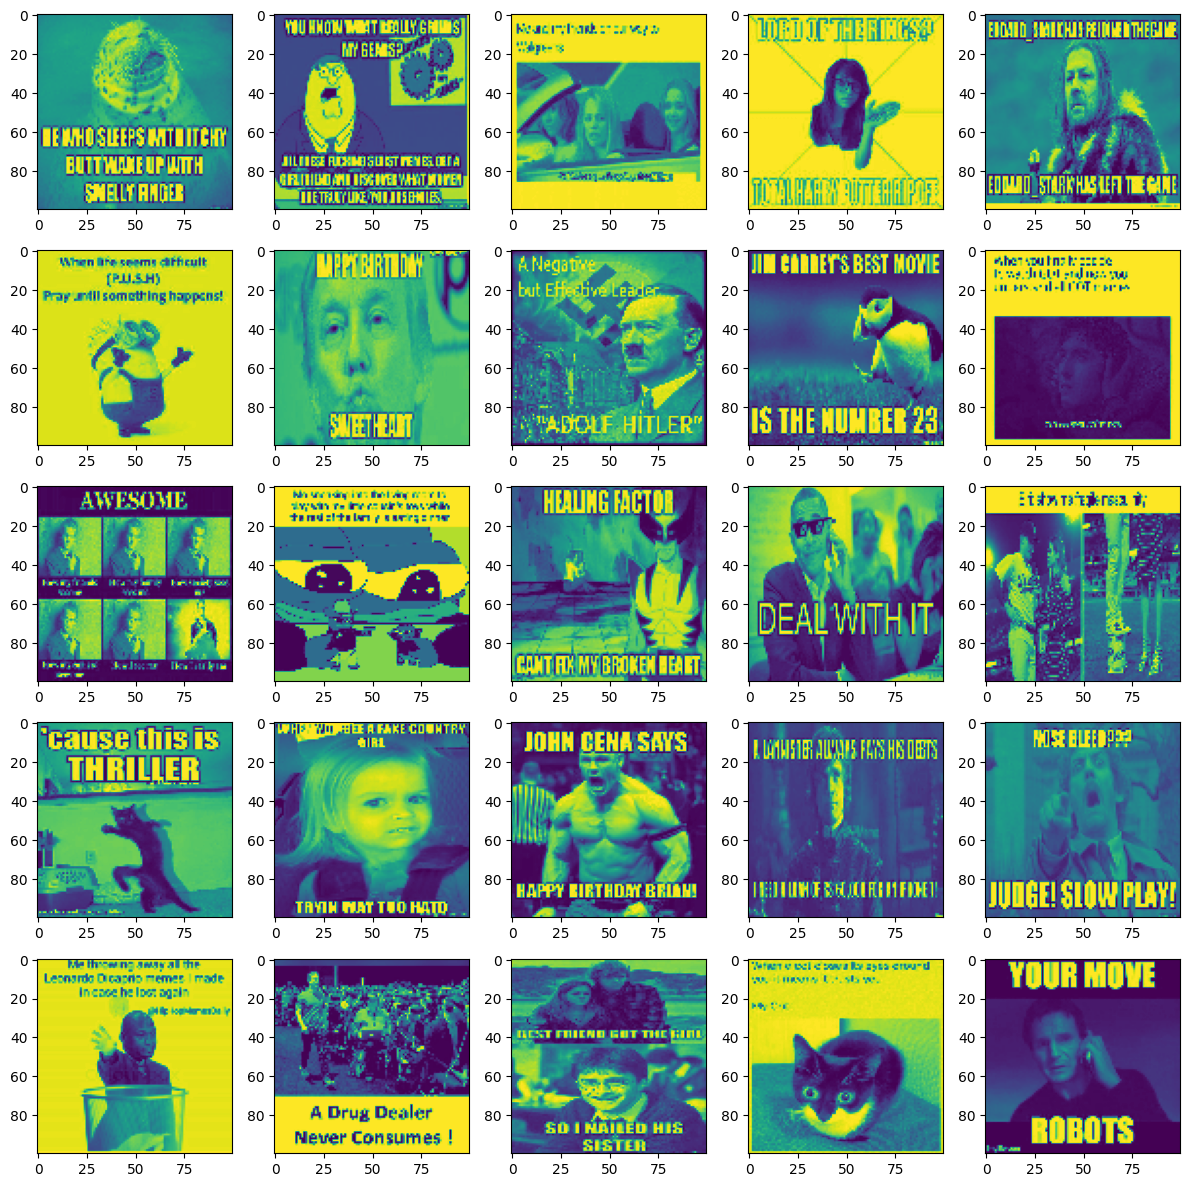

In [21]:
fig, axes = plt.subplots(5,5, figsize=(12, 12))

for i in range(5):
    for j in range(5):
        index = np.random.randint(X.shape[0])
        axes[i][j].imshow(X[index,:,:,0])
        plt.tight_layout()

In [22]:
'''In summary, the provided code sets up a pipeline for data augmentation, preprocessing,
and rescaling that is commonly used when working with image data in deep learning tasks.
These components are often integrated into a data preprocessing pipeline before feeding the
data into a neural network, especially when working with pre-trained models.'''

data_augmentation_layer = tf.keras.Sequential([
#This layer applies random horizontal flips to the input data. It horizontally flips images with a probability of 0.5.
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
#layer applies random rotations to the input data. The argument 0.2 represents the maximum rotation angle in radians.
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

#It is often used in conjunction with pre-trained models like ResNetV2 to ensure that
#input data is appropriately preprocessed before being fed into the model.
#The specific preprocessing steps may include mean subtraction and scaling.
preprocess_input = tf.keras.applications.resnet_v2.preprocess_input

'''This layer performs element-wise scaling, dividing each input by 127.5 and then
subtracting 1.0. This type of scaling is common in preprocessing when working with
image data in the range of [0, 255], and it helps bring the input values into a range
that is suitable for the neural network.'''
rescale_data = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)

In [23]:
''' here we are creating two instances of pre-trained convolutional neural network (CNN) models for
 feature extraction. Specifically, you are using the ResNet50 and VGG16 architectures provided by
  TensorFlow's Keras API.'''
model_1_resnet = tf.keras.applications.ResNet50(input_shape=X[0].shape,
                                               include_top=False,# here we are removing top layers of a prebiuild model so that we can fit it according to our data
                                               weights='imagenet')#here we are using pretarined weights of the model
model_2__vgg = tf.keras.applications.VGG16(input_shape=X[0].shape,
                                               include_top=False,
                                               weights='imagenet')

In summary, both model_1_resnet and model_2__vgg are pre-trained CNN models configured for feature extraction. These models can be used as the base or backbone of a larger neural network architecture, often in transfer learning scenarios where the pre-trained knowledge from ImageNet is leveraged for a specific task using a smaller dataset (X). The extracted features can then be used for further processing or combined with additional layers to build a complete neural network for a specific task, such as image classification or object detection.

In [24]:
model_1_resnet.trainable = False
model_2__vgg.trainable = False

In [25]:
# domensionality reduction technique
global_average_layer_2d = GlobalAveragePooling2D()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4)

In [27]:
'''the code defines a neural network architecture that takes an input image, applies data augmentation
and preprocessing, extracts features using two pre-trained base models (model_1_resnet and model_2__vgg),
concatenates the extracted features, and applies global average pooling and dropout for further processing.
The architecture is designed for image processing tasks, likely in a transfer learning scenario.'''

image_ip = tf.keras.Input(shape=(100, 100, 3), name = 'image_ip')
img_layer = data_augmentation_layer(image_ip)
img_layer = preprocess_input(img_layer)
layer_bm_1_resnet = model_1_resnet(image_ip, training=False)
layer_bm_1_resnet = Conv2D(2048, kernel_size=2,padding='valid')(layer_bm_1_resnet)
layer_bm_1_resnet = Dense(512)(layer_bm_1_resnet)
layer_bm_2_resnet = model_2__vgg(image_ip, training=False)
layer_bm_2_resnet = Dense(512)(layer_bm_2_resnet)
layers = tf.keras.layers.concatenate([layer_bm_1_resnet, layer_bm_2_resnet])
img_layer = global_average_layer_2d(layer_bm_1_resnet)
img_lyrs = Dropout(0.2, name = 'dropout_layer')(img_layer)

In [28]:
#here we are standardizing the data

def standardization(data_STD):
    data_STD = data_STD.apply(lambda x: x.lower())
    data_STD = data_STD.apply(lambda x: re.sub(r'\d+', '', x))
    data_STD = data_STD.apply(lambda x: re.sub(r'.com', '', x, flags=re.MULTILINE))
    data_STD = data_STD.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
    return data_STD

memes_data['text_corrected'] = standardization(memes_data.text_corrected)

In [29]:
#here we are onlt taking top 10000 words of the vocabulary model for training
#we'll try with 7000 words dictionary and check the accuracy

from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
vocab_size = 10000
sequence_length = 100

vectorize_layer = TextVectorization(
    max_tokens=vocab_size,
    output_mode='int',
    output_sequence_length=sequence_length)

text_ds = np.asarray(memes_data['text_corrected'])
vectorize_layer.adapt(tf.convert_to_tensor(text_ds))

Here we are splitting the dataset in test and train set and after doing so we are passing this dataset through a convolutional neural network.\
this is text transformation layer here we have passed it through different hidden layer.

In [30]:
X_text_train, X_text_test, y_text_train, y_text_test = train_test_split(cleaner_memes_data.text_corrected, Y, test_size = 0.4)

In [31]:
embedding_dim=16

text_ip = tf.keras.Input(shape=(1,), dtype=tf.string, name='text')
txt_lyrs = vectorize_layer(text_ip)
'''this is embedding layer in our neural network model. This Embedding layer is used to convert text data into dense vectors of fixed size.
It takes as input a sequence of word indices and outputs corresponding dense vectors nad these vectorizarization is done from vocabulary which
we created in earlier step.'''
txt_lyrs = tf.keras.layers.Embedding(vocab_size, embedding_dim, name="embedding")(txt_lyrs)
#here we are using dropout of rate of 50% for regularization of the input data
txt_lyrs = tf.keras.layers.Dropout(0.5)(txt_lyrs)
'''This line adds a bidirectional LSTM (Long Short-Term Memory) layer to the model.
Bidirectional LSTMs process input sequences in both forward and backward directions, which can capture dependencies in both directions.
in this layer we are using 256 neurons with ReLU as their activation function'''
txt_lyrs = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, activation='relu', return_sequences=True))(txt_lyrs)
#adding two convolutional layer with 128 neurons and kernel size of 7 with relu activation function with 3 strides
txt_lyrs = tf.keras.layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(txt_lyrs)
txt_lyrs = tf.keras.layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(txt_lyrs)
'''reducing dimensionality using global max pooling method it only keeps prominents feature and remove other features
it achives this by reducing the spatial dimensions of the input by taking the maximum value over the entire sequence.'''
txt_lyrs = tf.keras.layers.GlobalMaxPooling1D()(txt_lyrs)
# this is dense layer with ReLU activation and 2048 units to the model, followed by a dropout layer with a dropout rate of 0.5
txt_lyrs = tf.keras.layers.Dense(2048, activation="relu")(txt_lyrs)
txt_lyrs = tf.keras.layers.Dropout(0.5)(txt_lyrs)

now we are concatenating this two layers of image and text transformation and then passing it our final layer with 2048 neurons with softmax activation function

In [32]:
concatenate = tf.keras.layers.concatenate([img_lyrs, txt_lyrs], axis=1)

In [33]:
ovrall_lyrs = tf.keras.layers.Dense(2048, activation='softmax')(concatenate)

In [34]:
'''This code is creating several output layers for a neural network. Each prediction_layer is a dense layer responsible for producing
predictions for a specific category of the input data. each layer is similar to each other with 4 neurons with softmax activation function
only the motivational function has one nuron with sigmoid activation function'''
prediction_lyr_1 = tf.keras.layers.Dense(4, activation='softmax', name = 'sarcasm')
prediction_lyr_2 = tf.keras.layers.Dense(4, activation='softmax', name = 'humuor')
prediction_lyr_3 = tf.keras.layers.Dense(4, activation='softmax', name = 'offensive')
prediction_lyr_4 = tf.keras.layers.Dense(1, activation='sigmoid', name = 'motivational')
prediction_lyr_5 = tf.keras.layers.Dense(5, activation='softmax', name = 'overall')

In [35]:
#here we are constructing a multi-output neural network model using the Keras for different sentiments mentioned above
op_1 = prediction_lyr_1(ovrall_lyrs)
op_2 = prediction_lyr_2(ovrall_lyrs)
op_3 = prediction_lyr_3(ovrall_lyrs)
op_4 = prediction_lyr_4(ovrall_lyrs)
op_5 = prediction_lyr_5(ovrall_lyrs)
model = tf.keras.Model(inputs = [image_ip, text_ip] , outputs = [op_1, op_2, op_3, op_4, op_5])

In [36]:
!pip install tensorflow-addons

In [37]:
#!pip install typing_extensions==4.6.0
#inherit pypi python_flit_core
#from typing_extensions import buffer
!pip uninstall typing_extensions --yes
!pip install typing_extensions==4.7.1
import tensorflow_addons as tfa

Found existing installation: typing_extensions 4.7.1
Uninstalling typing_extensions-4.7.1:
  Successfully uninstalled typing_extensions-4.7.1
  Using cached typing_extensions-4.7.1-py3-none-any.whl (33 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.7.1 which is incompatible.


In [38]:
#configuring the trainning parameters in our model
base_learning_rate = 0.01
losses = {
      "humuor": tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      "sarcasm": tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      "offensive": tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      "motivational": tf.keras.losses.BinaryCrossentropy(from_logits=False),
      "overall": tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
}
lossWeights = {
      "humuor": 1.0,
      "sarcasm": 1.0,
      "offensive": 1.0,
      "motivational": 1.0,
      "overall": 1.0
}
metric = {
    "humuor": ['acc',tfa.metrics.F1Score(num_classes=4, average="micro", threshold = 0.9)],
    "sarcasm": ['acc',tfa.metrics.F1Score(num_classes=4, average="micro", threshold = 0.9)],
    "offensive": ['acc',tfa.metrics.F1Score(num_classes=4, average="micro", threshold = 0.9)],
    "motivational": ['acc',tfa.metrics.F1Score(num_classes=1, average="micro", threshold = 0.9)],
    "overall": ['acc',tfa.metrics.F1Score(num_classes=5, average="micro", threshold = 0.9)]
}
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss = losses,
              loss_weights= lossWeights,
              metrics=metric)

In [39]:
'''here we are training the neural network model multiple times, each time with a different learning rate(0.1 or 0.01).
also we are monitoring this training process for multiple tasks (sarcasm, humor, offensive, motivational, and overall sentiment) with the goal of
finding an optimal learning rate that results in good model performance. The training history for each learning rate is stored in the history
variable, which we are using for analysis and visualization.'''
learning_rates = [0.1, 0.01]
for i in learning_rates:
    model.compile(optimizer=tf.keras.optimizers.RMSprop(i),
              loss = losses,
              loss_weights= lossWeights,
              metrics=['accuracy'])

    history = model.fit(x={"image_ip": X_train, "text": X_text_train},
                    y={"sarcasm": y_train.sarcasm,
                       "humuor": y_train.humour,
                       "offensive": y_train.offensive,
                       "motivational": y_train.motivational,
                       "overall": y_train.overall_sentiment},
                    batch_size=32,
                    epochs=10,
                    verbose=1)


Epoch 1/10
131/131 [==============================] - 98s 503ms/step - loss: 5.6489 - sarcasm_loss: 1.1925 - humuor_loss: 1.3172 - offensive_loss: 1.1913 - motivational_loss: 0.6542 - overall_loss: 1.2936 - sarcasm_accuracy: 0.4989 - humuor_accuracy: 0.3242 - offensive_accuracy: 0.3648 - motivational_accuracy: 0.6448 - overall_accuracy: 0.4278
Epoch 2/10
131/131 [==============================] - 62s 476ms/step - loss: 5.6252 - sarcasm_loss: 1.1888 - humuor_loss: 1.3098 - offensive_loss: 1.1857 - motivational_loss: 0.6538 - overall_loss: 1.2870 - sarcasm_accuracy: 0.5011 - humuor_accuracy: 0.3414 - offensive_accuracy: 0.3820 - motivational_accuracy: 0.6460 - overall_accuracy: 0.4323
Epoch 3/10
131/131 [==============================] - 56s 425ms/step - loss: 5.6267 - sarcasm_loss: 1.1891 - humuor_loss: 1.3099 - offensive_loss: 1.1857 - motivational_loss: 0.6541 - overall_loss: 1.2880 - sarcasm_accuracy: 0.5035 - humuor_accuracy: 0.3383 - offensive_accuracy: 0.3877 - motivational_accura

In [40]:
pd.DataFrame(history.history)

,loss,sarcasm_loss,humuor_loss,offensive_loss,motivational_loss,overall_loss,sarcasm_accuracy,humuor_accuracy,offensive_accuracy,motivational_accuracy,overall_accuracy
0,5.565888,1.174661,1.296829,1.171802,0.650714,1.271883,0.503461,0.353068,0.391979,0.645978,0.448556
1,5.561314,1.173876,1.296040,1.170271,0.650469,1.270658,0.503461,0.346622,0.387682,0.645978,0.448556
2,5.563231,1.174867,1.296054,1.170341,0.650380,1.271591,0.503461,0.349964,0.393173,0.645978,0.448556
3,5.561669,1.174375,1.296084,1.170300,0.650256,1.270653,0.503461,0.351397,0.383146,0.645978,0.448556
4,5.560137,1.173894,1.295606,1.169161,0.650167,1.271310,0.503461,0.344951,0.382191,0.645978,0.448556
5,5.561435,1.173789,1.296172,1.170371,0.650454,1.270649,0.503461,0.346622,0.382191,0.645978,0.448556
6,5.562127,1.174240,1.295847,1.170329,0.650353,1.271358,0.503461,0.346861,0.392695,0.645978,0.448556
7,5.559522,1.173072,1.295219,1.169718,0.650267,1.271245,0.503223,0.348532,0.387205,0.645978,0.448794
8,5.560856,1.174032,1.295134,1.170655,0.650617,1.270420,0.503461,0.347816,0.387205,0.645978,0.448556
9,5.562355,1.174231,1.295825,1.170094,0.650635,1.271570,0.503461,0.347577,0.394366,0.645978,0.448556


In [41]:
#evaluating the model and getting the accuracy on our test data
evaluate = model.evaluate(x={"image_ip": X_test, "text": X_text_test},
                          y={"sarcasm": y_test.sarcasm,
                             "humuor": y_test.humour,
                             "offensive": y_test.offensive,
                             "motivational": y_test.motivational,
                             "overall": y_test.overall_sentiment},
                          batch_size=32,
                          verbose=2)


88/88 - 14s - loss: 5.5825 - sarcasm_loss: 1.1830 - humuor_loss: 1.2942 - offensive_loss: 1.1772 - motivational_loss: 0.6478 - overall_loss: 1.2804 - sarcasm_accuracy: 0.4991 - humuor_accuracy: 0.3240 - offensive_accuracy: 0.3792 - motivational_accuracy: 0.6495 - overall_accuracy: 0.4447 - 14s/epoch - 162ms/step


In [42]:
#trying to fit the model with different batch size number of epochs
learning_rates = [0.01,0.1] #we removed very low learning rates
for i in learning_rates:
    model.compile(optimizer=tf.keras.optimizers.RMSprop(i),
              loss = losses,
              loss_weights= lossWeights,
              metrics=['accuracy'])

    history = model.fit(x={"image_ip": X_train, "text": X_text_train},
                    y={"sarcasm": y_train.sarcasm,
                       "humuor": y_train.humour,
                       "offensive": y_train.offensive,
                       "motivational": y_train.motivational,
                       "overall": y_train.overall_sentiment},
                    batch_size=64,
                    epochs=25,
                    verbose=1)

Epoch 1/25
66/66 [==============================] - 53s 521ms/step - loss: 5.5603 - sarcasm_loss: 1.1739 - humuor_loss: 1.2959 - offensive_loss: 1.1702 - motivational_loss: 0.6501 - overall_loss: 1.2702 - sarcasm_accuracy: 0.5035 - humuor_accuracy: 0.3488 - offensive_accuracy: 0.3815 - motivational_accuracy: 0.6460 - overall_accuracy: 0.4486
Epoch 2/25
66/66 [==============================] - 30s 454ms/step - loss: 5.5604 - sarcasm_loss: 1.1739 - humuor_loss: 1.2955 - offensive_loss: 1.1699 - motivational_loss: 0.6505 - overall_loss: 1.2706 - sarcasm_accuracy: 0.5035 - humuor_accuracy: 0.3533 - offensive_accuracy: 0.3879 - motivational_accuracy: 0.6460 - overall_accuracy: 0.4486
Epoch 3/25
66/66 [==============================] - 33s 510ms/step - loss: 5.5599 - sarcasm_loss: 1.1745 - humuor_loss: 1.2951 - offensive_loss: 1.1698 - motivational_loss: 0.6504 - overall_loss: 1.2702 - sarcasm_accuracy: 0.5035 - humuor_accuracy: 0.3535 - offensive_accuracy: 0.3872 - motivational_accuracy: 0.

In [44]:
pd.DataFrame(history.history)

,loss,sarcasm_loss,humuor_loss,offensive_loss,motivational_loss,overall_loss,sarcasm_accuracy,humuor_accuracy,offensive_accuracy,motivational_accuracy,overall_accuracy
0,5.624588,1.188753,1.310562,1.184966,0.654677,1.285631,0.498687,0.331583,0.386727,0.645978,0.433516
1,5.617127,1.185085,1.312076,1.182181,0.653134,1.284650,0.503461,0.328479,0.377178,0.645978,0.427548
2,5.603440,1.182702,1.305438,1.178271,0.652949,1.284080,0.503461,0.338744,0.390785,0.639293,0.434471
3,5.613154,1.186320,1.308389,1.181521,0.653639,1.283285,0.503461,0.341609,0.375030,0.645978,0.440917
4,5.609808,1.184381,1.305695,1.183727,0.653639,1.282364,0.503461,0.345906,0.378611,0.645978,0.437336
5,5.606838,1.186662,1.306754,1.176803,0.654021,1.282597,0.503461,0.338506,0.396037,0.645978,0.436142
6,5.610878,1.182490,1.308377,1.183954,0.653129,1.282928,0.503461,0.336118,0.377656,0.645978,0.439723
7,5.614487,1.189056,1.307458,1.180950,0.654070,1.282952,0.503461,0.337312,0.394127,0.645978,0.439007
8,5.604819,1.185286,1.304256,1.179958,0.653349,1.281970,0.503461,0.338983,0.374552,0.645978,0.424922
9,5.609450,1.184888,1.308484,1.178440,0.654483,1.283156,0.503461,0.339222,0.389592,0.645978,0.439484


Now lets evaluate our model we can see we get 45% accuracy in training and in our testing set we are getting 44.47% accuracy.\

we can see this from loss and accuracy of the data from the graph below.

In [45]:
evaluate = model.evaluate(x={"image_ip": X_test, "text": X_text_test},
                          y={"sarcasm": y_test.sarcasm,
                             "humuor": y_test.humour,
                             "offensive": y_test.offensive,
                             "motivational": y_test.motivational,
                             "overall": y_test.overall_sentiment},
                          batch_size=64,
                          verbose=2)


44/44 - 6s - loss: 5.6302 - sarcasm_loss: 1.1971 - humuor_loss: 1.3135 - offensive_loss: 1.1856 - motivational_loss: 0.6506 - overall_loss: 1.2834 - sarcasm_accuracy: 0.4991 - humuor_accuracy: 0.3240 - offensive_accuracy: 0.3792 - motivational_accuracy: 0.6495 - overall_accuracy: 0.4447 - 6s/epoch - 146ms/step


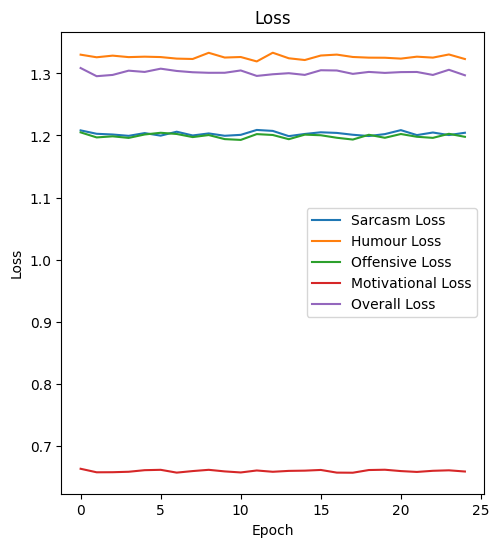

In [51]:
#loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['sarcasm_loss'], label='Sarcasm Loss')
plt.plot(history.history['humuor_loss'], label='Humour Loss')#new
plt.plot(history.history['offensive_loss'], label='Offensive Loss')#new
plt.plot(history.history['motivational_loss'], label='Motivational Loss')#new
plt.plot(history.history['overall_loss'], label='Overall Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

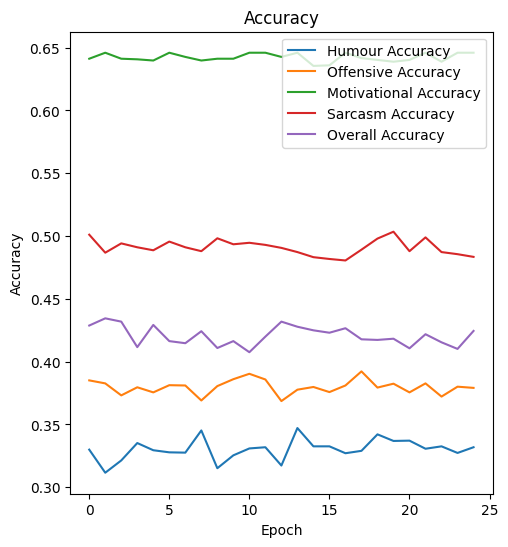

In [53]:
#accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['humuor_accuracy'], label='Humour Accuracy')
plt.plot(history.history['offensive_accuracy'], label='Offensive Accuracy')
plt.plot(history.history['motivational_accuracy'], label='Motivational Accuracy')
plt.plot(history.history['sarcasm_accuracy'], label='Sarcasm Accuracy')
plt.plot(history.history['overall_accuracy'], label='Overall Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

**Conclusion**

we can see that our overall accuracy is in the range of 43-45%.\
The accuracy for humour and offensive is not above 40% we can justify this accuracy as it is quite difficult to distinguisg between humuor and offensive content as both of them are inter related hence we have low accuracy for this category if combined them under one category then our model prediction rate will increase.\
the sarcasm accuracy is about 50% which is quite nice for a component with 5 output neurons.\
the accuracy of motivational content in our model is highest compared to others because there are only two possible outcome for this either yes or no hence we can explain the higher accuracy of the motivational sentiment.